In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Load and Explore the Data
# -------------------------------
# Replace 'data.csv' with your data file path or modify as needed.
data = pd.read_csv('species1.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get a summary of the dataset including count, mean, std, etc.
print("\nDataset Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

First 5 rows of the dataset:
   FSC-A :: FSC-A  FSC-H :: FSC-H  FSC-T :: FSC-T  FSC-W :: FSC-W  \
0               1               2            1023             166   
1               0               2            1023              96   
2               0               2            1023              78   
3               0               1            1023              92   
4               0               2            1023              71   

   SSC (Imaging)-A :: SSC (Imaging)-A  SSC (Imaging)-H :: SSC (Imaging)-H  \
0                                   0                                   1   
1                                   0                                   1   
2                                   0                                   1   
3                                   0                                   0   
4                                   0                                   0   

   SSC (Imaging)-T :: SSC (Imaging)-T  SSC (Imaging)-W :: SSC (Imaging)-W  \
0               

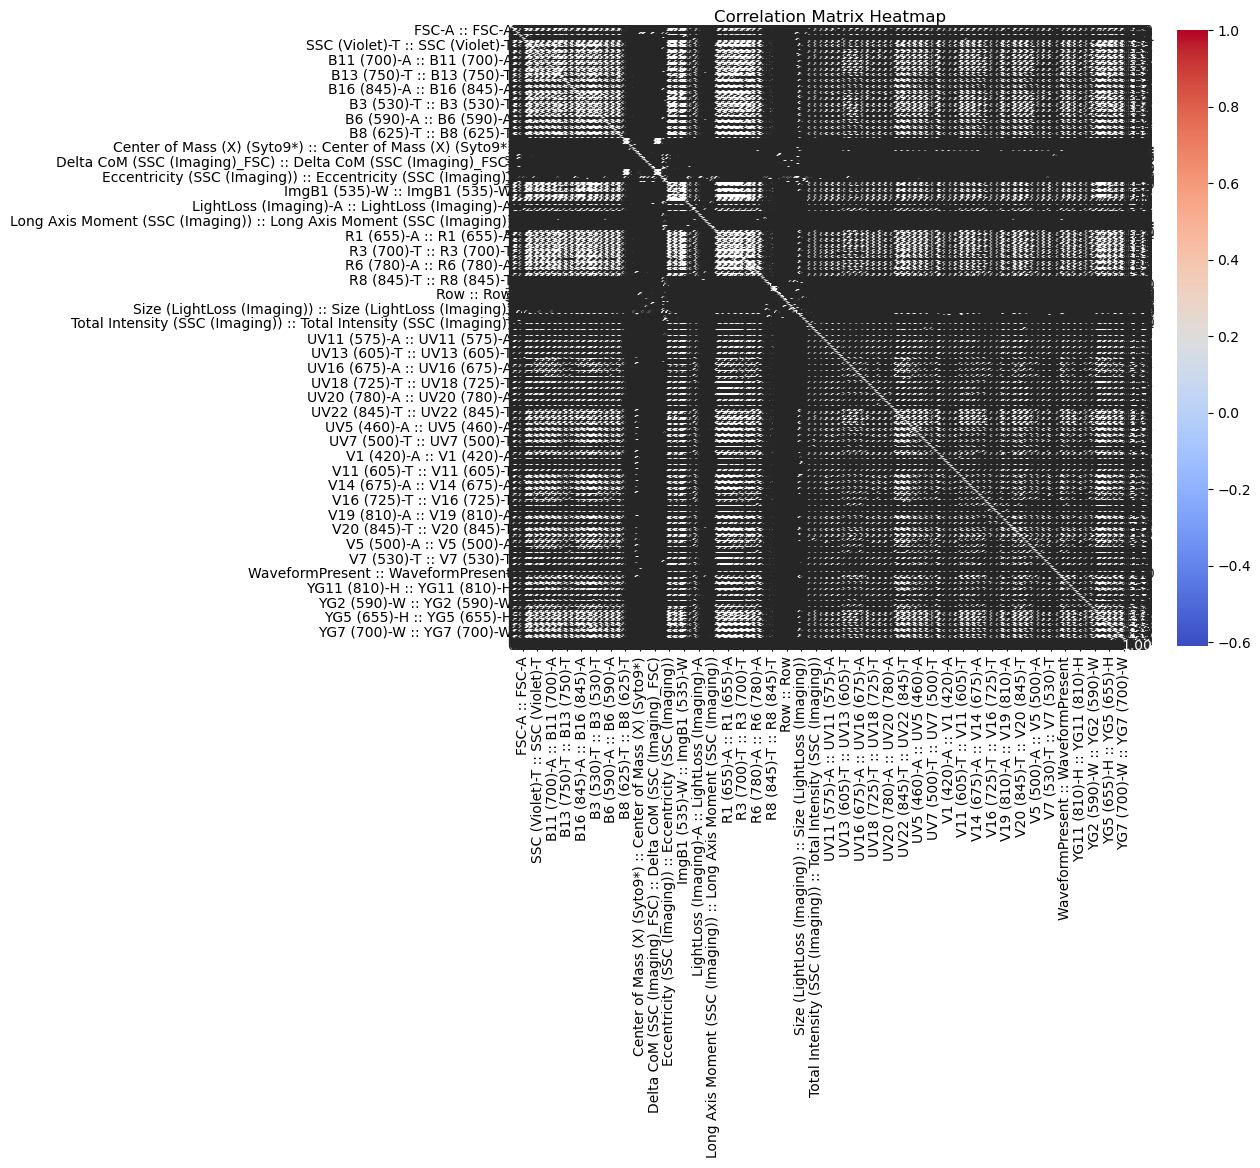

In [3]:
# -------------------------------
# 2. Correlation Plot
# -------------------------------
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# -------------------------------
# 3. Covariance Matrix Plot
# -------------------------------
# Compute the covariance matrix
cov_matrix = data.cov()

# Create a heatmap for the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
# -------------------------------
# 4. Dimensionality Reduction with PCA
# -------------------------------
# Select numerical columns for PCA (ignoring categorical variables)
numerical_data = data.select_dtypes(include=[np.number])

# Standardize the features (PCA is sensitive to the scale of the data)
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_data)

# Apply PCA to reduce to 2 dimensions (you can adjust n_components as needed)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_scaled)

# Print the explained variance ratio to see how much variance is captured by the components
print("\nExplained Variance Ratio (PCA components):", pca.explained_variance_ratio_)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, color='navy', edgecolor='w')
plt.title('PCA Result (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# -------------------------------
# 1. Load and Explore the Data
# -------------------------------
# Replace 'data.csv' with your data file path
data = pd.read_csv('species1.csv')

print("Original data shape:", data.shape)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get a summary of the dataset including count, mean, std, etc.
print("\nDataset Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

Original data shape: (100000, 420)
First 5 rows of the dataset:
   FSC-A :: FSC-A  FSC-H :: FSC-H  FSC-T :: FSC-T  FSC-W :: FSC-W  \
0               1               2            1023             166   
1               0               2            1023              96   
2               0               2            1023              78   
3               0               1            1023              92   
4               0               2            1023              71   

   SSC (Imaging)-A :: SSC (Imaging)-A  SSC (Imaging)-H :: SSC (Imaging)-H  \
0                                   0                                   1   
1                                   0                                   1   
2                                   0                                   1   
3                                   0                                   0   
4                                   0                                   0   

   SSC (Imaging)-T :: SSC (Imaging)-T  SSC (Imaging)-W :: 

In [13]:
# -------------------------------
# 2. Remove Constant Features
# -------------------------------
# Identify constant features (columns with only one unique value)
constant_features = [col for col in data.columns if data[col].nunique() == 1]
print(f"\nFound {len(constant_features)} constant features.")

# Drop constant features to reduce complexity
data.drop(columns=constant_features, inplace=True) #+["Time :: Time"]
print("Data shape after removing constant features:", data.shape)


Found 3 constant features.
Data shape after removing constant features: (100000, 417)


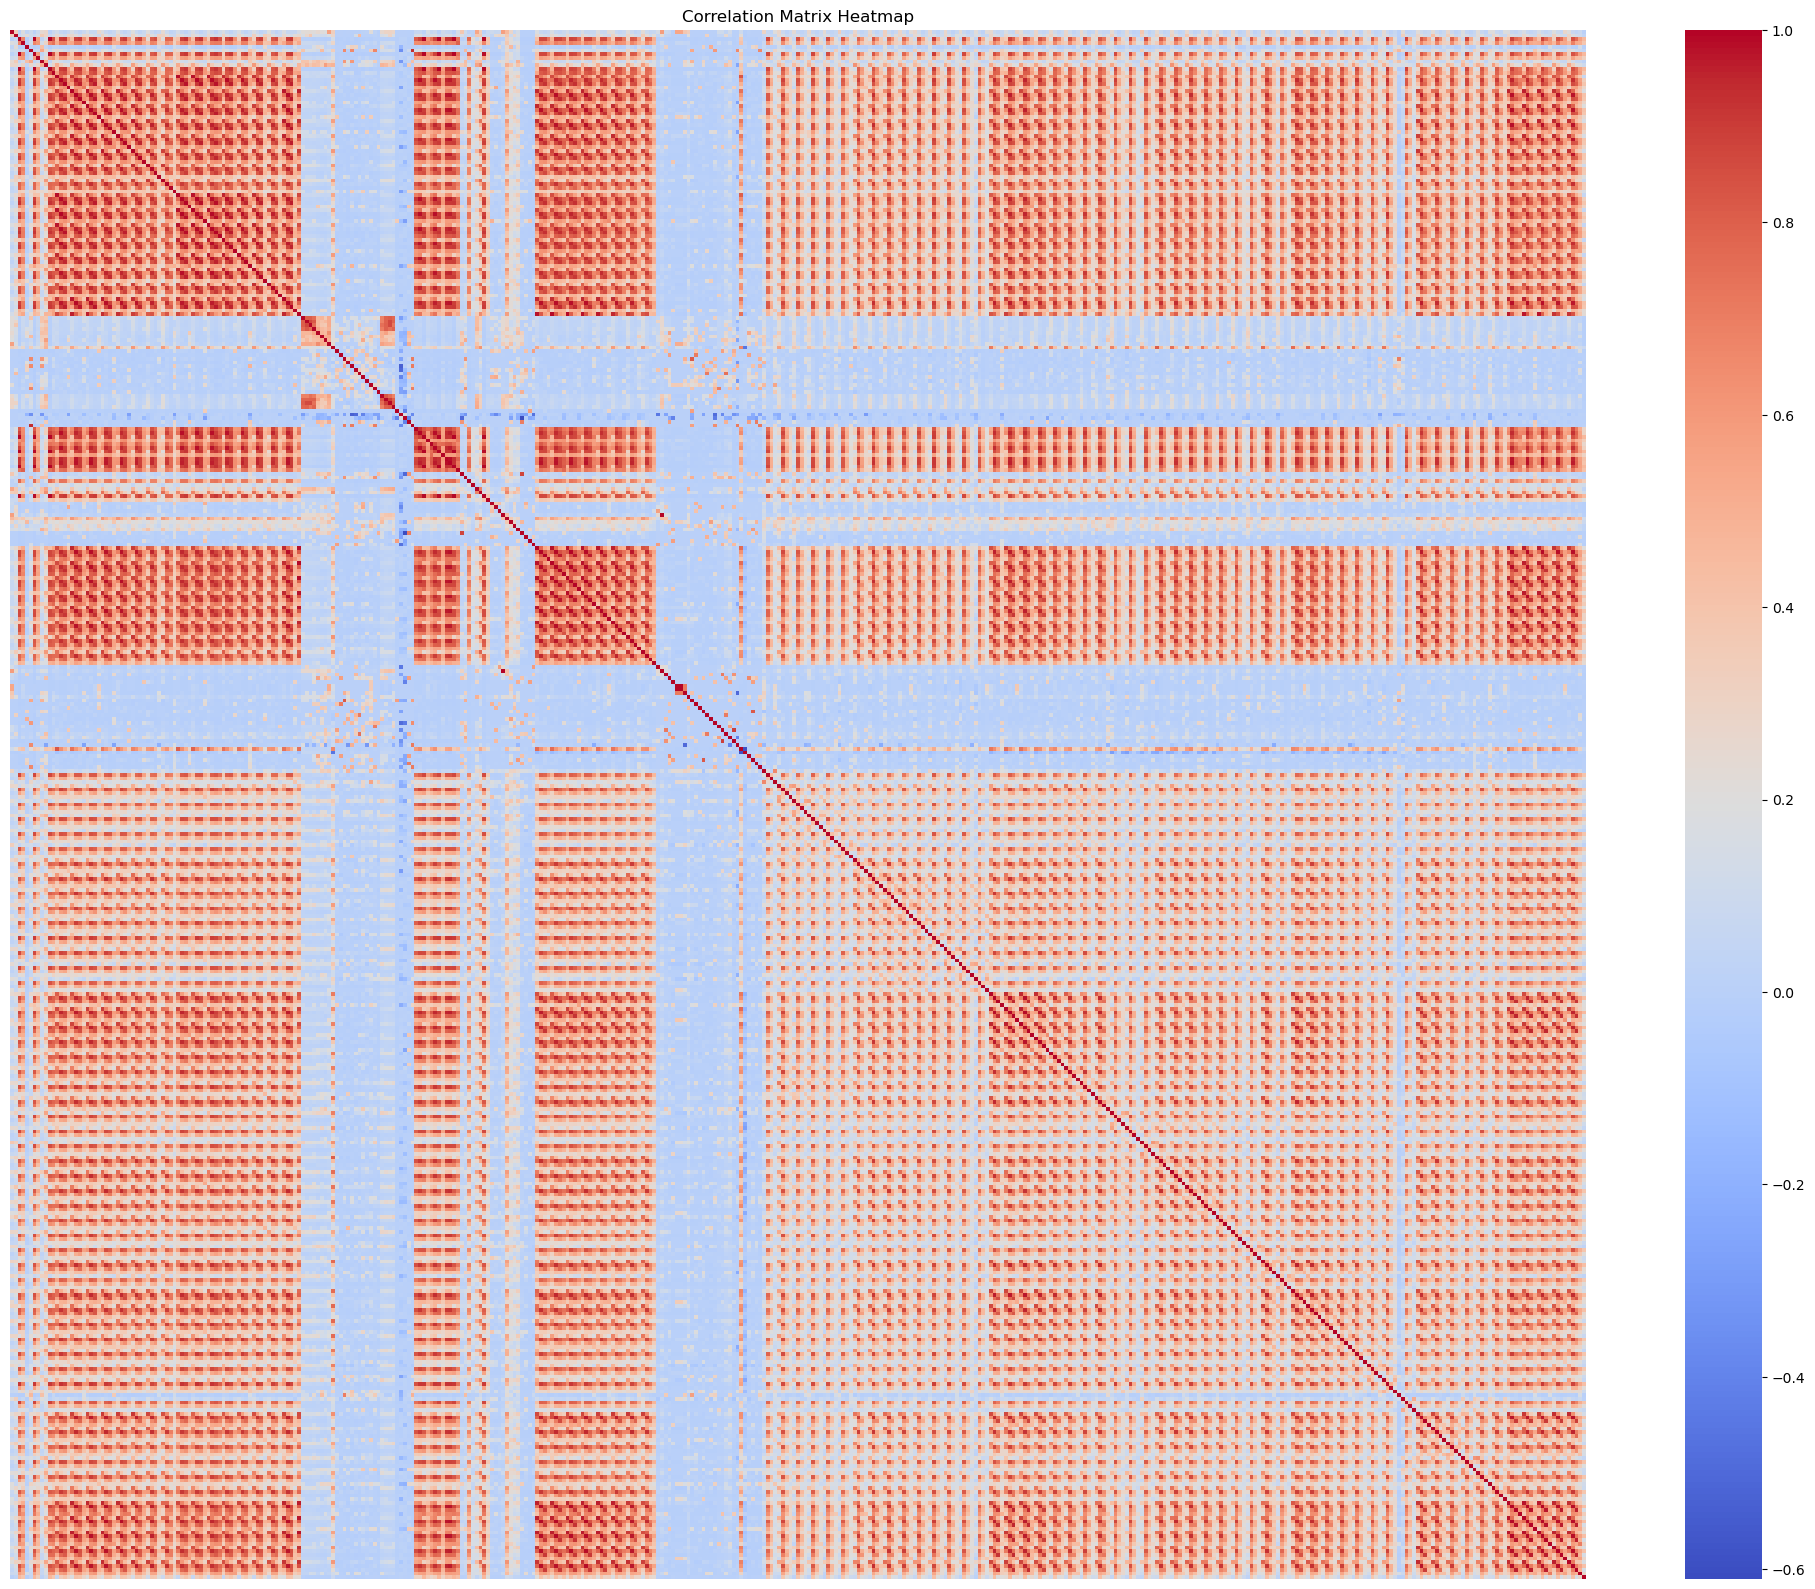

In [14]:
# -------------------------------
# 3. Correlation Plot
# -------------------------------
# Compute the correlation matrix
corr_matrix = data.corr()

# For a large number of features, it's best not to clutter the plot with tick labels.
show_labels = True if corr_matrix.shape[0] <= 30 else False

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',
            xticklabels=show_labels, yticklabels=show_labels)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [15]:
# -------------------------------
# 3. Compute Correlation and Covariance Matrices
# -------------------------------
corr_matrix = data.corr()
cov_matrix = data.cov()


/home/rvalenciaaz/.local/share/mamba/envs/datos/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/rvalenciaaz/.local/share/mamba/envs/datos/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


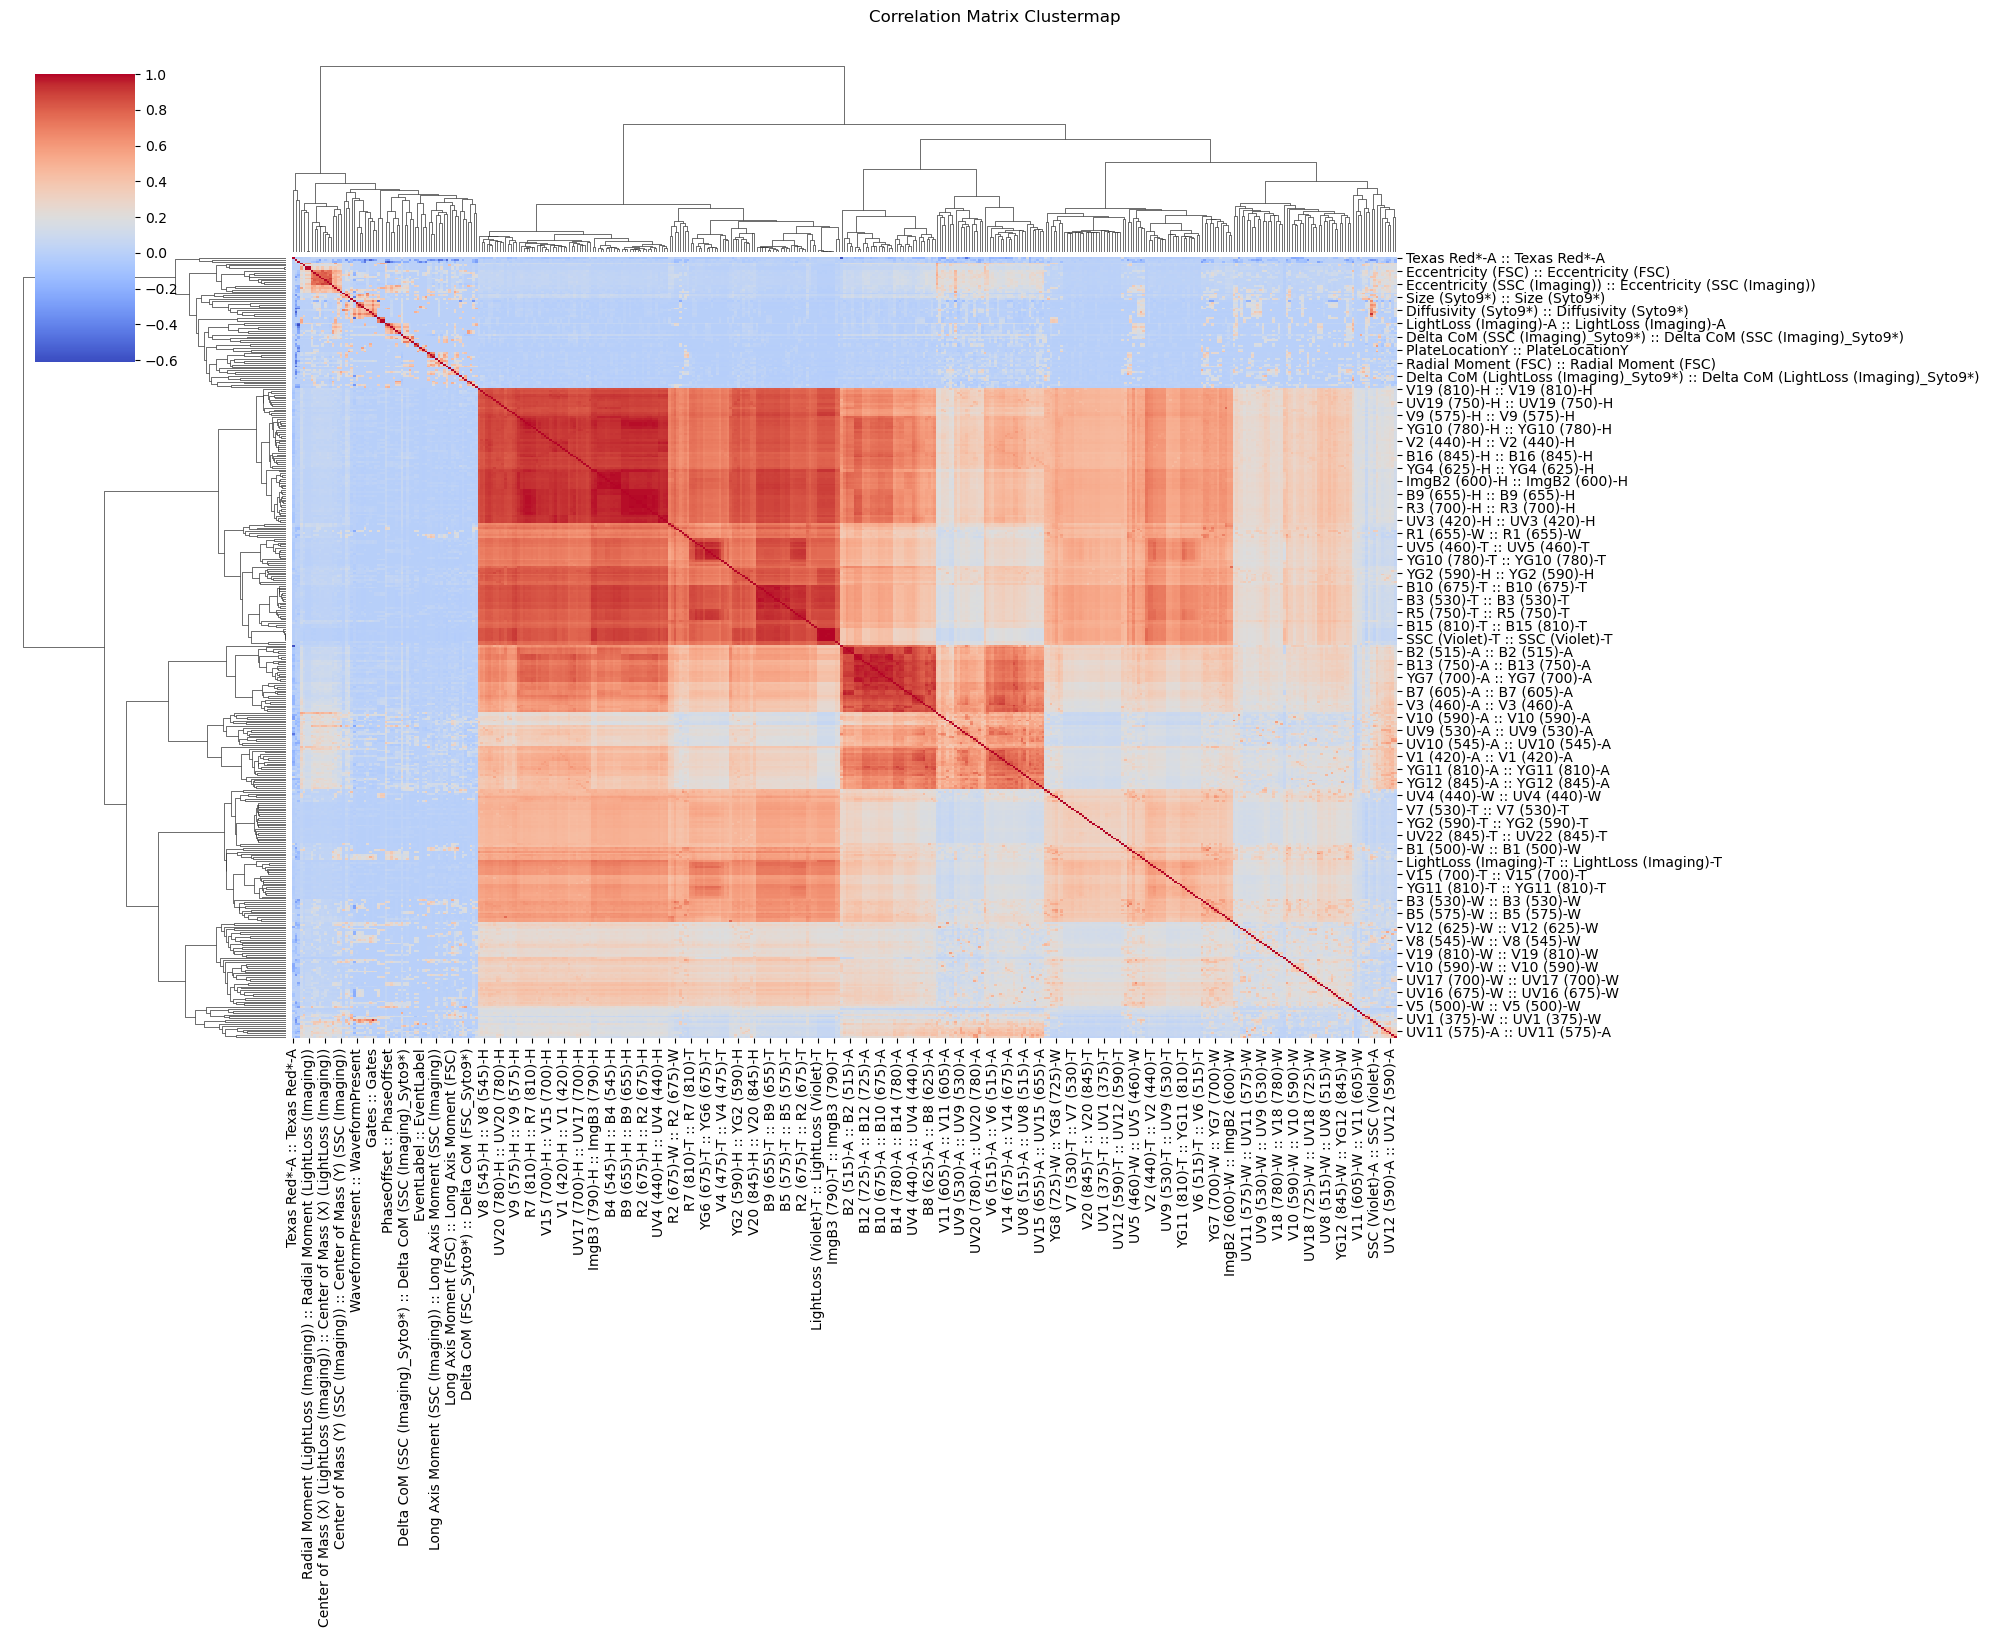

In [16]:
# -------------------------------
# 4. Reorder and Plot the Correlation Matrix
# -------------------------------
# Using clustermap to reorder based on similarity (hierarchical clustering)
cg_corr = sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(20, 16))
cg_corr.fig.suptitle("Correlation Matrix Clustermap", y=1.02)
plt.show()

/home/rvalenciaaz/.local/share/mamba/envs/datos/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/rvalenciaaz/.local/share/mamba/envs/datos/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


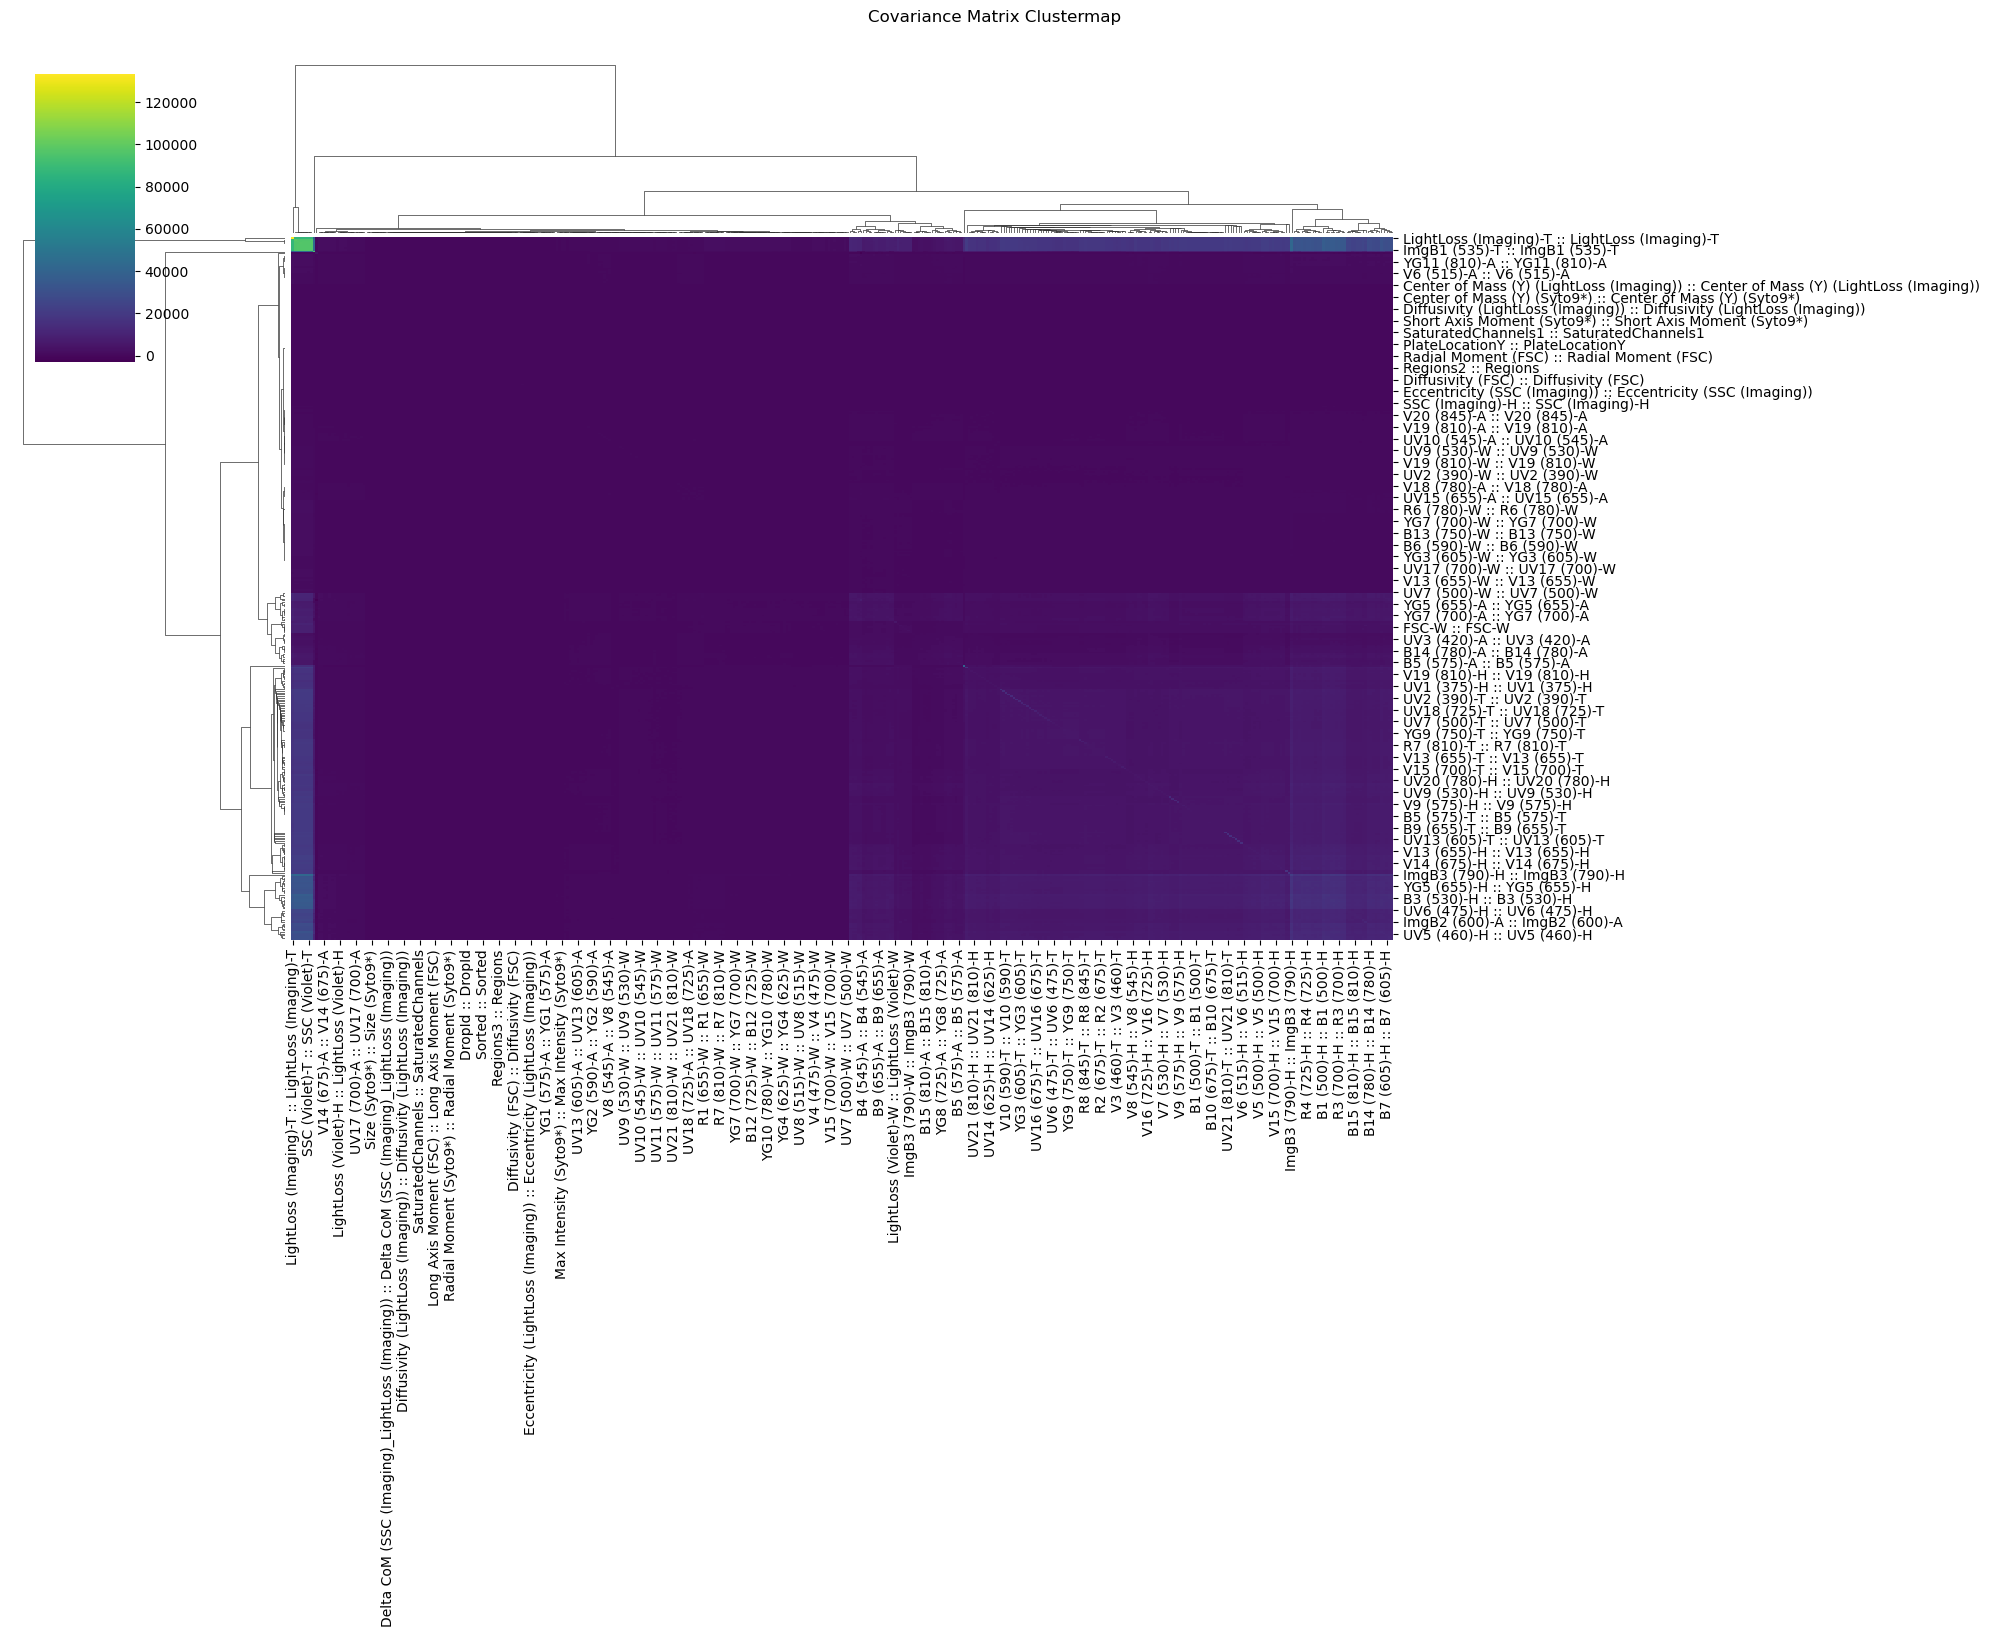

In [17]:
# -------------------------------
# 5. Reorder and Plot the Covariance Matrix
# -------------------------------
cg_cov = sns.clustermap(cov_matrix, cmap='viridis', figsize=(20, 16))
cg_cov.fig.suptitle("Covariance Matrix Clustermap", y=1.02)
plt.show()

In [ ]:
# -------------------------------
# 4. Covariance Matrix Plot
# -------------------------------
# Compute the covariance matrix
cov_matrix = data.cov()

plt.figure(figsize=(20, 16))
sns.heatmap(cov_matrix, annot=False, cmap='viridis',
            xticklabels=show_labels, yticklabels=show_labels)
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Dimensionality Reduction with PCA
# -------------------------------
# Select only numerical features for PCA (ignoring categorical variables)
numerical_data = data.select_dtypes(include=[np.number])
print("Data shape for PCA (numerical features):", numerical_data.shape)

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_data)

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_scaled)

print("\nExplained Variance Ratio (PCA components):", pca.explained_variance_ratio_)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Because we have 100,000 samples, plot a random subsample to avoid clutter.
subsample_size = min(5000, len(pca_df))
pca_sample = pca_df.sample(n=subsample_size, random_state=42)

plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_sample, s=10, alpha=0.6, color='navy', edgecolor=None)
plt.title('PCA Result (2D Projection) - Sample of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import glob

# Use glob to get all CSV files starting with "species" in the current directory
csv_files = glob.glob("species*.csv")

# List to hold DataFrames
dfs = []

for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Extract label from the filename, e.g., 'species1.csv' -> 'species1'
    label = file.split('.')[0]
    
    # Add the Label column
    df['Label'] = label
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(combined_df.head())

combined_df["Label"]=combined_df["Label"].str.replace("species","")

   FSC-A :: FSC-A  FSC-H :: FSC-H  FSC-T :: FSC-T  FSC-W :: FSC-W  \
0               1               4            1023             175   
1               1               3            1023             113   
2               1               4            1023             151   
3               2               5            1023             174   
4               1               4            1023             150   

   SSC (Imaging)-A :: SSC (Imaging)-A  SSC (Imaging)-H :: SSC (Imaging)-H  \
0                                   0                                   1   
1                                   0                                   1   
2                                   0                                   1   
3                                   0                                   1   
4                                   0                                   1   

   SSC (Imaging)-T :: SSC (Imaging)-T  SSC (Imaging)-W :: SSC (Imaging)-W  \
0                                1023        

In [4]:
#combined_df.to_csv("combined_species_labels.csv",index=False)

In [5]:
# -------------------------------
# 2. Remove Constant Features
# -------------------------------
# Identify constant features (columns with only one unique value)
constant_features = [col for col in combined_df.columns if combined_df[col].nunique() == 1]
print(f"\nFound {len(constant_features)} constant features.")

# Drop constant features to reduce complexity
con_df=combined_df.drop(columns=constant_features) #+["Time :: Time"]
print("Data shape after removing constant features:", con_df.shape)


Found 0 constant features.
Data shape after removing constant features: (900000, 421)


In [6]:
# -------------------------------
# 3. Compute Correlation and Covariance Matrices
# -------------------------------
#corr_matrix = con_df.corr()
#cov_matrix = data.cov()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Assume combined_df is already created (for example, by concatenating CSV files as shown previously)
# combined_df = pd.read_csv('your_concatenated_file.csv')  # Alternatively, if saved

# Separate features (X) and target (y)
X = con_df.drop(columns=["Label"])
y = con_df["Label"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale the features for better performance (especially if features are on different scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the classifier (using Logistic Regression here)
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))